<a href="https://colab.research.google.com/github/Anku192/AIML-class/blob/main/Copy_of_ML_Lab_Experiment_03_1RUA24CSE0059.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab Experiment 03
**Objective:** Build a linear regression model to analyze the relationship between dependent and independent variables.
<hr>

#### 🧑‍🎓 Student Details

| Field                | Information                |
|---------------------|----------------------------|
| 👨‍🎓 **Name**            | _[ANKUR P B]_     |
| 🆔 **USN**              | _[1RUA24CSE0059]_           |
| **Section**        | _[A]_ |
| **Programme**   | B.Tech(H)             |
| **School**  | Computer Science and Engineering |


In [7]:
import platform
import psutil
from datetime import datetime
import sys
import getpass
import os

# Timestamp
timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
# System Information
system_info = {
    "User Name": getpass.getuser(),
    "Timestamp": timestamp,
    "OS": platform.system() + " " + platform.release(),
    "Processor": platform.processor(),
    "RAM (GB)": round(psutil.virtual_memory().total / (1024 ** 3), 2),
    "Python Version": platform.python_version(),
    "Working Directory": os.getcwd()
}
# Print formatted results
print("🧑‍💻 System Details\n" + "-"*40)
for key, value in system_info.items():
    print(f"{key:20}: {value}")


🧑‍💻 System Details
----------------------------------------
User Name           : root
Timestamp           : 2025-09-04 05:07:34
OS                  : Linux 6.1.123+
Processor           : x86_64
RAM (GB)            : 12.67
Python Version      : 3.12.11
Working Directory   : /content


### Student Tasks
<hr>

##### Learning Objectives

1. Understand the fundamentals of linear regression and its applications
2. Implement linear regression using scikit-learn library
3. Analyze relationships between dependent and independent variables
4. Evaluate model performance using appropriate metrics
5. Visualize regression results and interpret model coefficients

**Step 01:**
- Import pandas, numpy, scikit-learn, matplotlib, seaborn and other required libraries for linear regression analysis.

In [14]:
# [ Edit this cell ] Write your code below this line and execute the cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**Step 02:**
- Load the provided dataset (CSV format is recommended) using pandas and perform initial data exploration.

In [15]:
# [ Edit this cell ] Write your code below this line and execute the cell
# Load the HousingData.csv dataset
dataset = pd.read_csv('HousingData.csv')
print("Dataset loaded successfully!")
print(dataset.head())

Dataset loaded successfully!
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


**Step 03:**
- Perform Exploratory Data Analysis

In [16]:
# [ Edit this cell ] Write your code below this line and execute the cell
# Basic dataset information
print("Dataset Shape:", dataset.shape)
print("\nMissing Values:")
print(dataset.isna().sum())
print("\nDataset Info:")
print(dataset.info())
print("\nDataset Description:")
print(dataset.describe())



Dataset Shape: (506, 14)

Missing Values:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), 

**Step 04:**
- Demonstrate relationship between variables and identify potential correlations..

In [17]:
# [ Edit this cell ] Write your code below this line and execute the cell
# Handle missing values by filling with mean for numerical columns
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

# Verify no missing values remain
print("Missing values after handling:")
print(dataset.isna().sum())


Missing values after handling:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


**Step 05:**
- Data preprocessing and feature selection - Handle missing values, select relevant features, and prepare data for modeling.

Correlation Matrix:
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.182930  0.391161 -0.052223  0.410377 -0.215434  0.344934   
ZN      -0.182930  1.000000 -0.513336 -0.036147 -0.502287  0.316550 -0.541274   
INDUS    0.391161 -0.513336  1.000000  0.058035  0.740965 -0.381457  0.614592   
CHAS    -0.052223 -0.036147  0.058035  1.000000  0.073286  0.102284  0.075206   
NOX      0.410377 -0.502287  0.740965  0.073286  1.000000 -0.302188  0.711461   
RM      -0.215434  0.316550 -0.381457  0.102284 -0.302188  1.000000 -0.241351   
AGE      0.344934 -0.541274  0.614592  0.075206  0.711461 -0.241351  1.000000   
DIS     -0.366523  0.638388 -0.699639 -0.091680 -0.769230  0.205246 -0.724353   
RAD      0.608886 -0.306316  0.593176  0.001425  0.611441 -0.209847  0.449989   
TAX      0.566528 -0.308334  0.716062 -0.031483  0.668023 -0.292048  0.500589   
PTRATIO  0.273384 -0.403085  0.384806 -0.109310  0.188933 -0.355501  0.262723   
B       

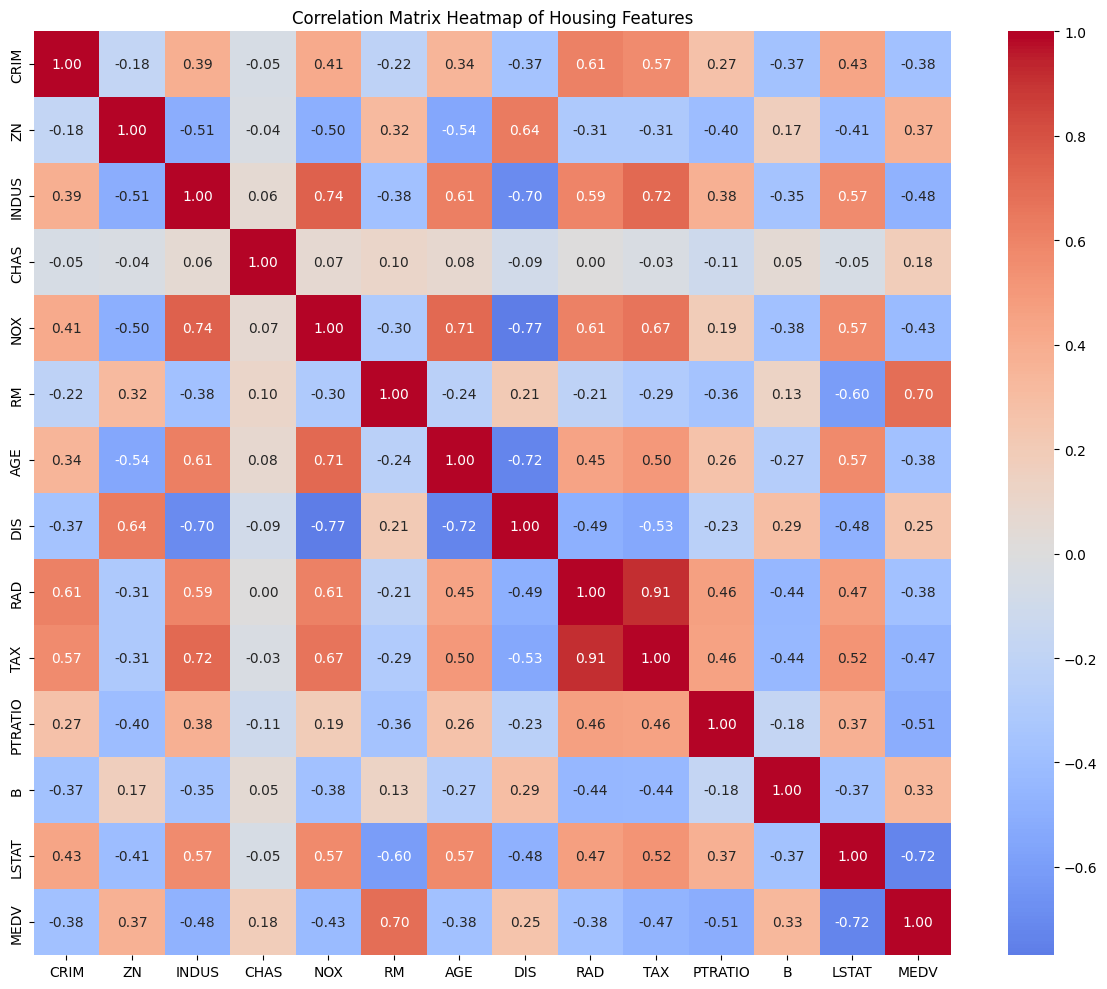

In [19]:
# [ Edit this cell ] Write your code below this line and execute the cell
# Calculate correlation matrix
# Calculate correlation matrix
corr_matrix = dataset.corr()
print("Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Matrix Heatmap of Housing Features')
plt.tight_layout()
plt.show()

KeyError: 'species'

**Step 06:**
- Split data into training and testing sets - Divide the dataset into training and testing portions for model validation.

In [20]:
# [ Edit this cell ] Write your code below this line and execute the cell

# Features and target (using MEDV as target variable)
X = dataset.drop('MEDV', axis=1)
y = dataset['MEDV']

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display results
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nX_train head:")
print(X_train.head())
print("\ny_train head:")
print(y_train.head())

Training set shape: (404, 13)
Testing set shape: (102, 13)

X_train head:
         CRIM         ZN  INDUS  CHAS     NOX     RM        AGE     DIS  RAD  \
477  15.02340   0.000000  18.10   0.0  0.6140  5.304  97.300000  2.1007   24   
15    0.62739   0.000000   8.14   0.0  0.5380  5.834  56.500000  4.4986    4   
332   0.03466  11.211934   6.06   0.0  0.4379  6.031  23.300000  6.6407    1   
423   7.05042   0.000000  18.10   0.0  0.6140  6.103  68.518519  2.0218   24   
19    0.72580   0.000000   8.14   0.0  0.5380  5.727  69.500000  3.7965    4   

     TAX  PTRATIO       B  LSTAT  
477  666     20.2  349.48  24.91  
15   307     21.0  395.62   8.47  
332  304     16.9  362.25   7.83  
423  666     20.2    2.52  23.29  
19   307     21.0  390.95  11.28  

y_train head:
477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: MEDV, dtype: float64


**Step 07:**
- Build and train the linear regression model - Create and train the linear regression model using scikit-learn.

In [21]:
# [ Edit this cell ] Write your code below this line and execute the cell

# Build the Linear Regression model
model = LinearRegression()

# Train (fit) the model
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

**Step 08:**
- Model evaluation and performance metrics -
Evaluate the model using appropriate metrics (R², MSE, MAE) and interpret results.

In [22]:
# [ Edit this cell ] Write your code below this line and execute the cell
# Evaluate the model
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared (R²):", r2_score(y_test, y_pred))

Intercept: 27.912465201030926
Coefficients: [-1.14139919e-01  2.90156278e-02 -2.71329054e-02  3.24067342e+00
 -1.60175433e+01  4.75240956e+00 -1.95196142e-02 -1.52159267e+00
  2.22822577e-01 -9.15063665e-03 -8.86045288e-01  1.22626115e-02
 -4.38440425e-01]
Mean Absolute Error (MAE): 3.1499233573457692
Mean Squared Error (MSE): 25.01767202384268
Root Mean Squared Error (RMSE): 5.0017668901941725
R-squared (R²): 0.6588520195508143


**Step 09:**
- Visualize results and model interpretation - Create visualizations showing actual vs predicted values, residual plots, and interpret model coefficients.

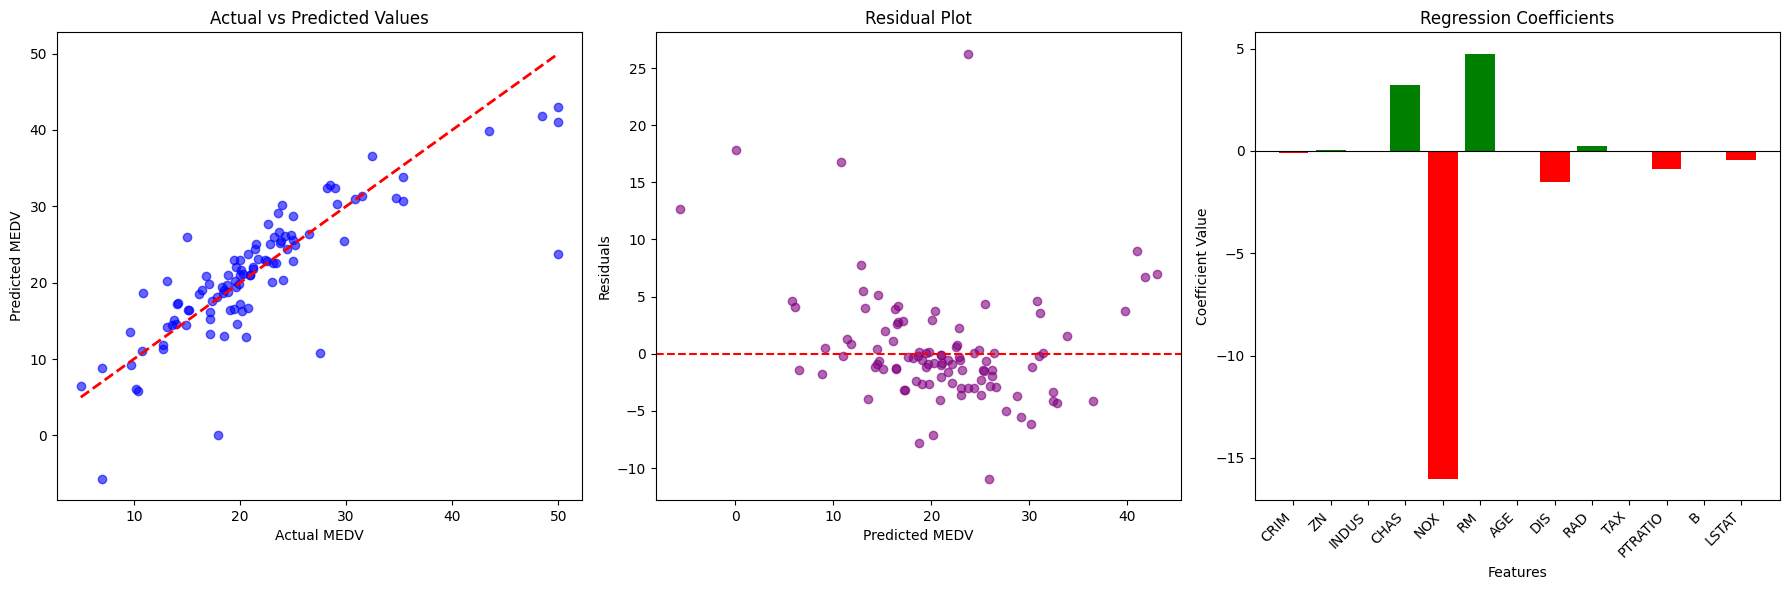


Model Interpretation:
1. Actual vs Predicted: Points close to the red line indicate good predictions
2. Residual Plot: Random scatter around zero indicates good model fit
3. Coefficients: Positive values increase MEDV, negative values decrease MEDV


In [23]:
# [ Edit this cell ] Write your code below this line and execute the cell
# Create subplots
plt.figure(figsize=(18, 6))

# 1. Actual vs Predicted plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted Values')

# 2. Residual plot
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# 3. Coefficients bar plot
plt.subplot(1, 3, 3)
features = X.columns
coefficients = model.coef_
colors = ['green' if c > 0 else 'red' for c in coefficients]
plt.bar(features, coefficients, color=colors)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Regression Coefficients')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()

# Interpretation
print("\nModel Interpretation:")
print("1. Actual vs Predicted: Points close to the red line indicate good predictions")
print("2. Residual Plot: Random scatter around zero indicates good model fit")
print("3. Coefficients: Positive values increase MEDV, negative values decrease MEDV")

### ✅ Rubric: Linear Regression (10 Marks)
<hr>

**For Course Instructor Use**

A rubric for accessing experiment focused on outlier handling and categorical data encoding.

| **Criteria**                     | **Description**                                                                                         | **Max Marks** | **Marks Obtained** |
|----------------------------------|---------------------------------------------------------------------------------------------------------|---------------|---------------------|
| **Data Loading & Exploration**  | Proper dataset loading, initial exploration.                   |      3        |                     |
| **Model Implementation and Model Implementation**         | Correct implementation of linear regression using scikit-learn; proper data splitting and preprocessing with model evaluation            |      3        |                     |
| **Visualization & Analysis**     | Clear visualizations of results, residual analysis, and proper interpretation of regression coefficients. |      2        |                     |
| **Documentation & Viva Insight** | Brief comments, explanations, and ability to answer questions during viva on technique choices.         |      2        |                     |

**Marks Obtained: ______ / 10**

<hr>

**Course Instructor Signature:** ____________________      

##### Link for pandoc - Download the Software for export PDF for submission in GCR
https://github.com/jgm/pandoc/releases/tag/3.7.0.2